# Data collection and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
#importing essential modules

In [29]:
data=pd.read_table('einkommen.train',sep=',')
#Importinig dataset 

In [30]:
data.columns = ['Age', 'Employment_type', 'Weighting_factor ', 'Level_of_education', 'Schooling', 'Marital_status','Employment_area', 'Partnership', 'Ethnicity', 'Gender', 'Gains', 'Losses', 'Working_time', 'Country_of_birth', 'Income']
data
#Adding names to columns 

,Age,Employment_type,Weighting_factor,Level_of_education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Working_time,Country_of_birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


In [31]:
data.head()

,Age,Employment_type,Weighting_factor,Level_of_education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Working_time,Country_of_birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [32]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,29999.0,38.582453,13.647975,17.0,28.0,37.0,48.0,90.0
Weighting_factor,29999.0,189771.251875,105441.775914,12285.0,117833.0,178478.0,236939.0,1484705.0
Schooling,29999.0,10.079636,2.572223,1.0,9.0,10.0,12.0,16.0
Gains,29999.0,1091.650588,7467.510668,0.0,0.0,0.0,0.0,99999.0
Losses,29999.0,86.624087,401.535593,0.0,0.0,0.0,0.0,4356.0
Working_time,29999.0,40.431948,12.313299,1.0,40.0,40.0,45.0,99.0


In [33]:
data.describe(include = [np.object])
#as you can see categorical values as Country_of_birth,Prof-specialty have many unique variables

,Employment_type,Level_of_education,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Country_of_birth,Income
count,29999,29999,29999,29999,29999,29999,29999,29999,29999
unique,9,16,7,15,6,5,2,42,3
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,?
freq,20901,9692,13768,3802,12138,25635,20069,26870,25000


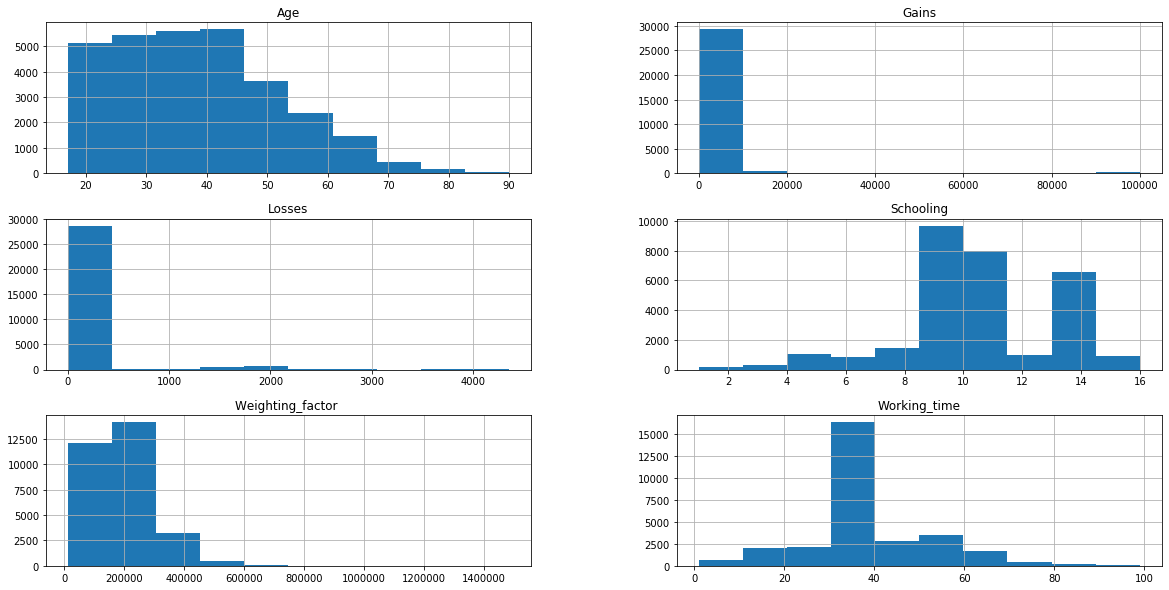

In [34]:
data.hist(figsize=(20,10))
plt.show()

In [35]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

numeric_data

,Age,Weighting_factor,Schooling,Gains,Losses,Working_time
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
29994,30,55481,14,0,0,45
29995,48,119471,11,0,0,56
29996,61,167347,10,0,0,35
29997,41,184378,9,0,0,40


In [36]:
categorical_data
#Our aim is to predict whether the Income of individuals exceed 50.000 or not

,Employment_type,Level_of_education,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Country_of_birth,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
29994,Private,Masters,Never-married,Tech-support,Unmarried,White,Male,Nicaragua,?
29995,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,Philippines,?
29996,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,?
29997,Private,HS-grad,Separated,Craft-repair,Not-in-family,White,Male,United-States,?


In [37]:
def get_uniques(data_frame, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(data_frame[column].unique())
    return uniques

In [38]:
get_uniques(data, categorical_data)
#There is missing data labeled as "?" 

{'Employment_type': [' Self-emp-not-inc',
  ' Private',
  ' State-gov',
  ' Federal-gov',
  ' Local-gov',
  ' ?',
  ' Self-emp-inc',
  ' Without-pay',
  ' Never-worked'],
 'Level_of_education': [' Bachelors',
  ' HS-grad',
  ' 11th',
  ' Masters',
  ' 9th',
  ' Some-college',
  ' Assoc-acdm',
  ' Assoc-voc',
  ' 7th-8th',
  ' Doctorate',
  ' Prof-school',
  ' 5th-6th',
  ' 10th',
  ' 1st-4th',
  ' Preschool',
  ' 12th'],
 'Marital_status': [' Married-civ-spouse',
  ' Divorced',
  ' Married-spouse-absent',
  ' Never-married',
  ' Separated',
  ' Married-AF-spouse',
  ' Widowed'],
 'Employment_area': [' Exec-managerial',
  ' Handlers-cleaners',
  ' Prof-specialty',
  ' Other-service',
  ' Adm-clerical',
  ' Sales',
  ' Craft-repair',
  ' Transport-moving',
  ' Farming-fishing',
  ' Machine-op-inspct',
  ' Tech-support',
  ' ?',
  ' Protective-serv',
  ' Armed-Forces',
  ' Priv-house-serv'],
 'Partnership': [' Husband',
  ' Not-in-family',
  ' Wife',
  ' Own-child',
  ' Unmarried',
  ' Ot

In [39]:
data.isnull().sum()

Age                   0
Employment_type       0
Weighting_factor      0
Level_of_education    0
Schooling             0
Marital_status        0
Employment_area       0
Partnership           0
Ethnicity             0
Gender                0
Gains                 0
Losses                0
Working_time          0
Country_of_birth      0
Income                0
dtype: int64

In [40]:
data.isin([' ?']).sum()

Age                       0
Employment_type        1677
Weighting_factor          0
Level_of_education        0
Schooling                 0
Marital_status            0
Employment_area        1682
Partnership               0
Ethnicity                 0
Gender                    0
Gains                     0
Losses                    0
Working_time              0
Country_of_birth        539
Income                25000
dtype: int64

In [41]:
data['Employment_type'].replace(' ?',np.nan, inplace = True)
data['Employment_area'].replace(' ?',np.nan, inplace = True)
data['Country_of_birth'].replace(' ?',np.nan, inplace = True)
data.isin([' ?']).sum()
#By replacing the "?" values with Null values we can fill the columns with most common values later

Age                       0
Employment_type           0
Weighting_factor          0
Level_of_education        0
Schooling                 0
Marital_status            0
Employment_area           0
Partnership               0
Ethnicity                 0
Gender                    0
Gains                     0
Losses                    0
Working_time              0
Country_of_birth          0
Income                25000
dtype: int64

In [42]:
data.isnull().sum()
#Now the "?" values are tranformed as Null values

Age                      0
Employment_type       1677
Weighting_factor         0
Level_of_education       0
Schooling                0
Marital_status           0
Employment_area       1682
Partnership              0
Ethnicity                0
Gender                   0
Gains                    0
Losses                   0
Working_time             0
Country_of_birth       539
Income                   0
dtype: int64

In [82]:
data= data.apply(lambda x:x.fillna(x.value_counts().index[0]))
data.isnull().sum()

Age                   0
Employment_type       0
Weighting_factor      0
Level_of_education    0
Schooling             0
Marital_status        0
Employment_area       0
Partnership           0
Ethnicity             0
Gender                0
Gains                 0
Losses                0
Working_time          0
Country_of_birth      0
Income                0
dtype: int64

Text(0, 0.5, 'Individuals')

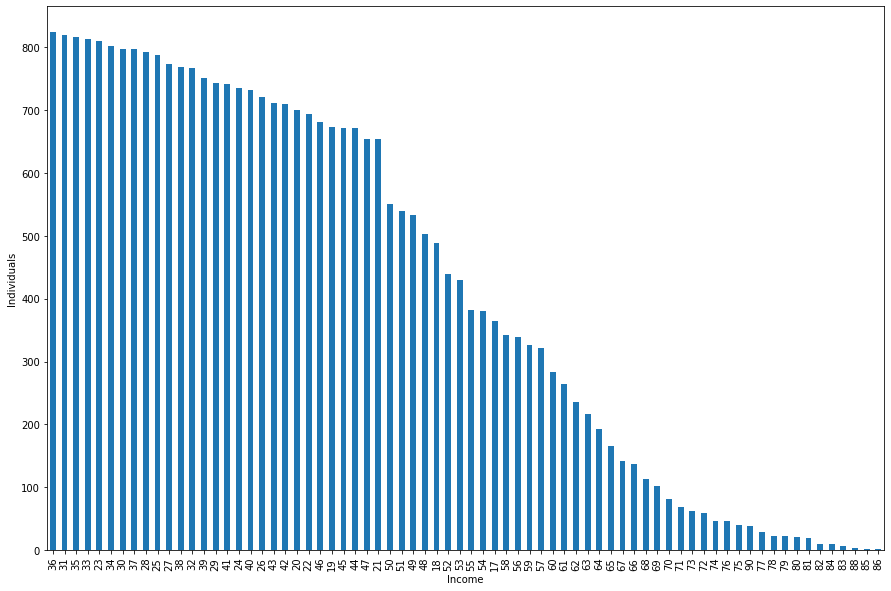

In [97]:
data['Age'].value_counts().plot(kind = "bar" , figsize = (15,10))
plt.xlabel('Age')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

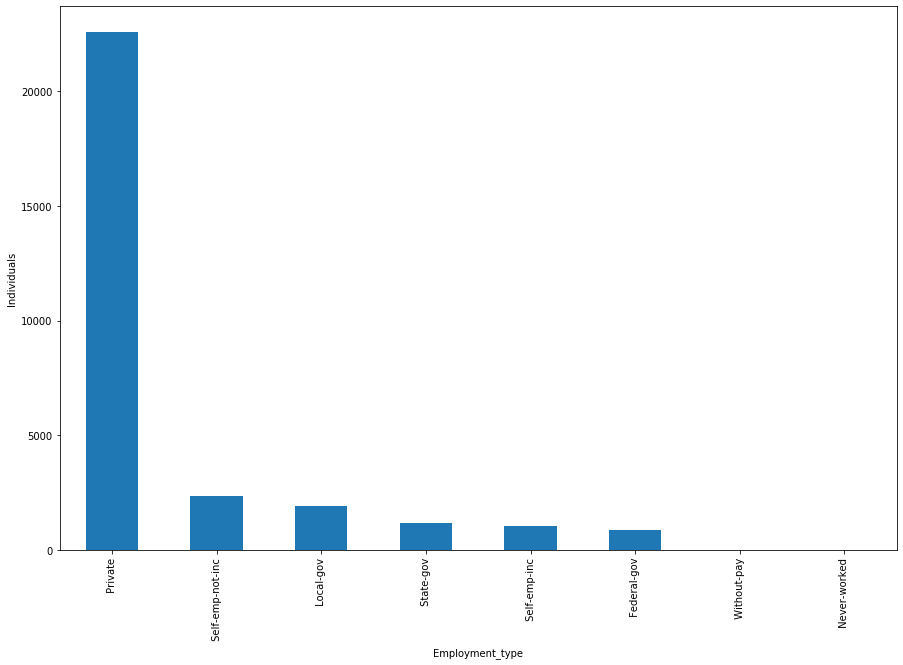

In [101]:
data['Employment_type'].value_counts().plot(kind = 'bar', figsize = (15,10))
plt.xlabel('Employment_type')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

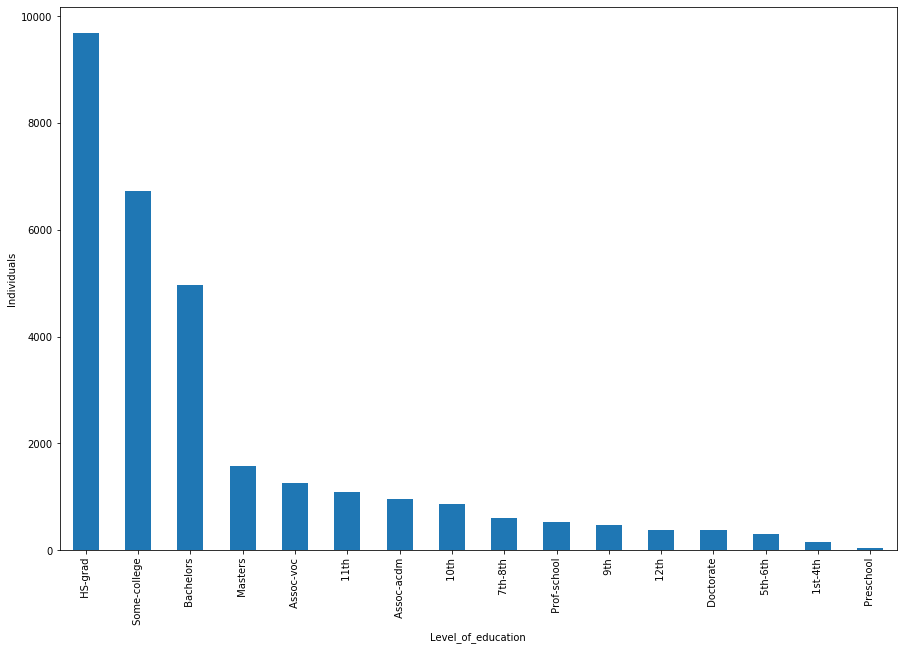

In [102]:
data['Level_of_education'].value_counts().plot(kind = "bar" , figsize = (15,10))
plt.xlabel('Level_of_education')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

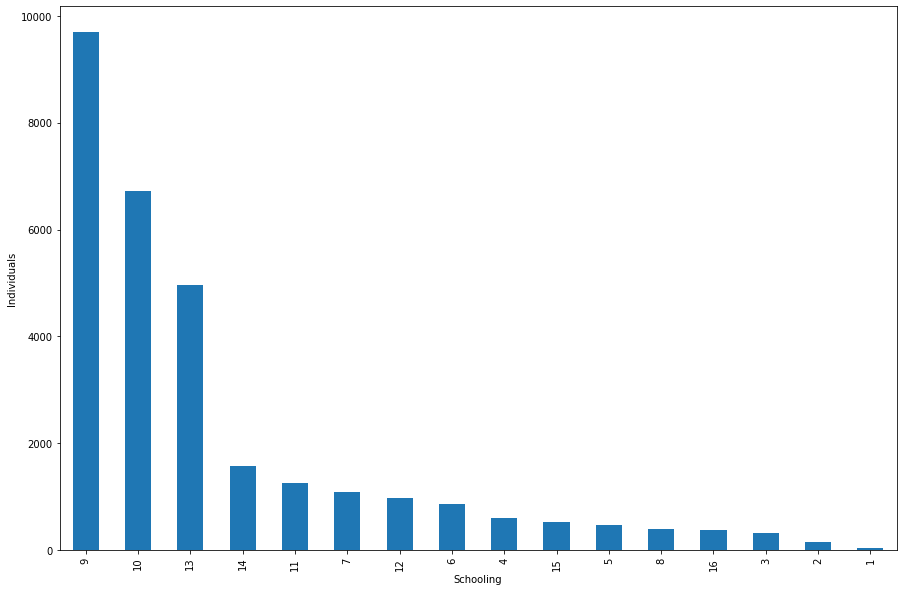

In [103]:
data['Schooling'].value_counts().plot(kind = "bar" , figsize = (15,10))
plt.xlabel('Schooling')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

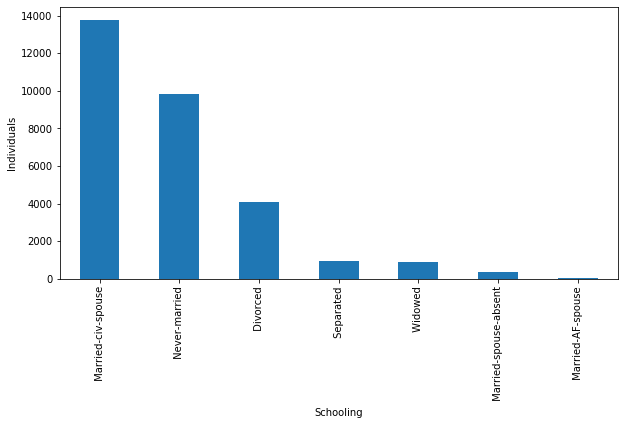

In [105]:
data['Marital_status'].value_counts().plot(kind = "bar" , figsize = (10,5))
plt.xlabel('Schooling')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

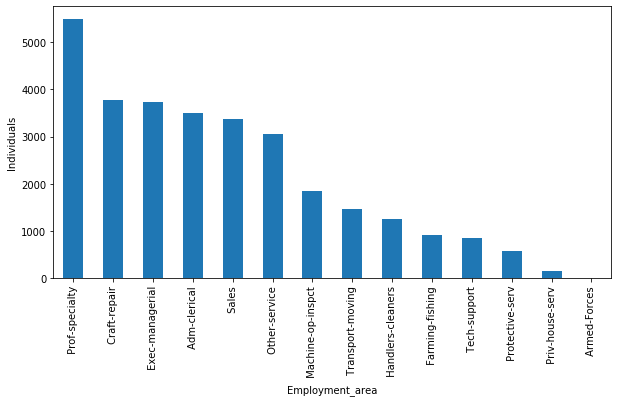

In [106]:
data['Employment_area'].value_counts().plot(kind = "bar" , figsize = (10,5))
plt.xlabel('Employment_area')
plt.ylabel('Individuals')

Text(0, 0.5, 'Individuals')

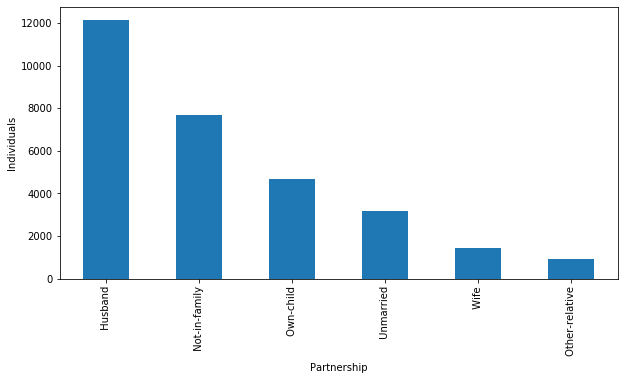

In [107]:
data['Partnership'].value_counts().plot(kind = "bar" , figsize = (10,5))
plt.xlabel('Partnership')
plt.ylabel('Individuals')

In [44]:
print('Income:\n',data['Income'].value_counts())
data['Income'].replace({' >50K' : 1, ' <=50K':0}, inplace = True)
data

Income:
  ?        25000
 <=50K     3778
 >50K      1221
Name: Income, dtype: int64


,Age,Employment_type,Weighting_factor,Level_of_education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Working_time,Country_of_birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,?
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,?
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,?
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,?


In [45]:
applying_data =data[data.Income == ' ?']
working_data= data[data.Income != ' ?']

Text(0, 0.5, 'Individuals')

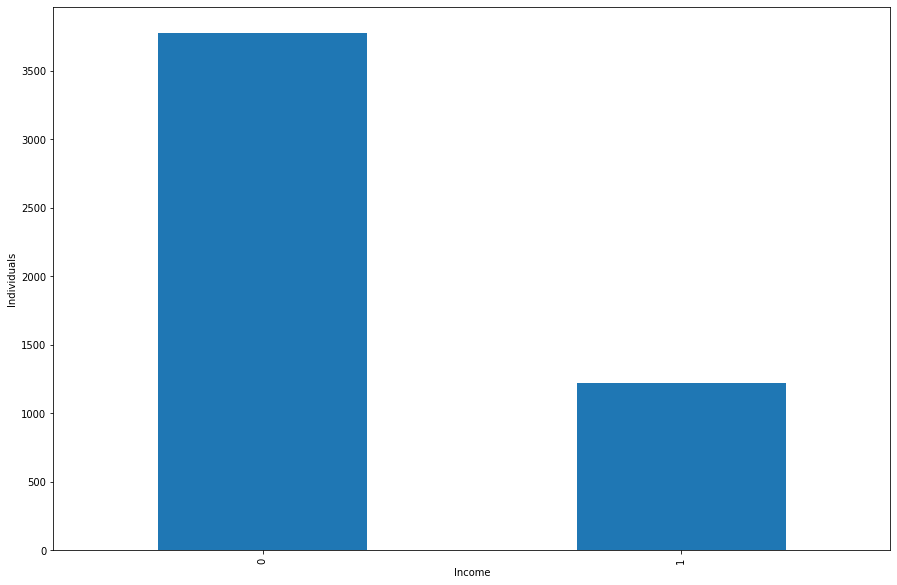

In [99]:
working_data['Income'].value_counts().plot(kind = "bar" , figsize = (15,10))
plt.xlabel('Income')
plt.ylabel('Individuals')

In [46]:
#one hot encoding so I can turn the catrgorical data into numeric data.
working_data_OHE = pd.get_dummies(working_data.iloc[:,:data.shape[1]-1])
working_data_OHE['Income'] = working_data['Income']
working_data_OHE.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Columns: 103 entries, Age to Income
dtypes: int64(6), object(1), uint8(96)
memory usage: 781.1+ KB


# Training and evaluating models

In [66]:
X = working_data_OHE.drop('Income', axis = 1)
Y = working_data_OHE['Income']
Y=Y.astype('int')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=100)
X_test.size

153000

# Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logistic_regression_model = LogisticRegression(class_weight='balanced')
logistic_regression_model.fit(X_train, Y_train)
model_of_lg=logistic_regression_model.fit(X_train, Y_train)
Y_train_pred = logistic_regression_model.predict(X_train)
Y_test_pred = logistic_regression_model.predict(X_test)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte1 = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte1)


Confusion Matrix Training:
 [[2023  627]
 [ 145  704]]
Accurray Training: 0.7793655330094312
Confusion Matrix Testing:
 [[876 252]
 [ 49 323]]
Accurray Test: 0.7993333333333333


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold_validation=KFold(5)

CV_lg=cross_val_score(logistic_regression_model,X_test,Y_test,cv=kfold_validation)
CV_lg_with_mean=cross_val_score(logistic_regression_model,X_train,Y_train,cv=kfold_validation).mean()
print(CV_lg)
print(np.mean(CV_lg_with_mean))

[0.79       0.82       0.8        0.81333333 0.74666667]
0.7839354179440017


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(max_depth=8, n_estimators=200, random_state=100, class_weight='balanced')
rfmodel.fit(X_train, Y_train)
Y_train_pred = rfmodel.predict(X_train)
cmtr_RF= confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr_RF)


acctr_RF= accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr_RF)

Y_test_pred = rfmodel.predict(X_test)
cmte_RF= confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte_RF)

accte_RF= accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte_RF)

rfmodel.score

In [ ]:
#CROSS-VALIDATION
results_RF=cross_val_score(rfmodel,X_test,Y_test,cv=kfold_validation)
results_with_mean_RF=cross_val_score(rfmodel,X_train,Y_train,cv=kfold_validation).mean()
print(results_RF)
print(np.mean(results_with_mean_RF))

# Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
decision_model= DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=20, min_samples_split=5)
decision_model.fit(X_train, Y_train)
decision_model_pred_train= decision_model.predict(X_train)
cmtr_DT = confusion_matrix(Y_train, decision_model_pred_train)
print("Confusion Matrix Training:\n", cmtr_DT)

acctr_DT = accuracy_score(Y_train, decision_model_pred_train)
print("Accurray Training:", acctr_DT)

decision_model_pred_test= decision_model.predict(X_test)
cmte_DT= confusion_matrix(Y_test, decision_model_pred_test)
print("Confusion Matrix Testing:\n", cmte_DT)
accte_DT= accuracy_score(Y_test, decision_model_pred_test)
print("Accurray Test:", accte_DT)

Confusion Matrix Training:
 [[2563   87]
 [ 138  711]]
Accurray Training: 0.9356959131180337
Confusion Matrix Testing:
 [[1006  122]
 [ 149  223]]
Accurray Test: 0.8193333333333334


In [76]:
#CROSS-VALIDATION
results_DT=cross_val_score(decision_model,X_test,Y_test,cv=kfold_validation)
results_with_mean_DT=cross_val_score(decision_model,X_train,Y_train,cv=kfold_validation).mean()
print(results_DT)
print(np.mean(results_with_mean_DT))

[0.81333333 0.81333333 0.80666667 0.84       0.80666667]
0.8090844062947067


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian = GaussianNB()
model_gaussian.fit(X_train,Y_train)
Y_train_pred_G= model_gaussian.predict(X_train)
Y_test_pred_G= model_gaussian.predict(X_test)

In [ ]:
cmtr_gaussian= confusion_matrix(Y_train, Y_train_pred_G)
print("Confusion Matrix Training:\n", cmtr_gaussian)

acctr_gaussian= accuracy_score(Y_train, Y_train_pred_G)
print("Accurray Training:", acctr_gaussian)

cmte_gaussian= confusion_matrix(Y_test, Y_test_pred_G)
print("Confusion Matrix Testing:\n", cmte_gaussian)

accte_gaussian= accuracy_score(Y_test,Y_test_pred_G)
print("Accurray Test:", accte_gaussian)


In [ ]:
#CROSS-VALIDATION
results_Gaussian=cross_val_score(model_gaussian,X_test,Y_test,cv=kfold_validation)
results_with_mean_Gaussian=cross_val_score(model_gaussian,X_train,Y_train,cv=kfold_validation).mean()
print(results_Gaussian)
print(np.mean(results_Gaussian))

# Support vector machines (SVMs)

In [73]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)
Y_train_pred_SVM= svm_model.predict(X_train)
Y_test_pred_SVM= svm_model.predict(X_test)


In [74]:
cmtr_SVM= confusion_matrix(Y_train, Y_train_pred_SVM)
print("Confusion Matrix Training:\n", cmtr_SVM)

acctr_SVM= accuracy_score(Y_train, Y_train_pred_SVM)
print("Accurray Training:", acctr_SVM)

cmte_SVM= confusion_matrix(Y_test, Y_test_pred_SVM)
print("Confusion Matrix Testing:\n", cmte_SVM)

accte_SVM= accuracy_score(Y_test,Y_test_pred_SVM)
print("Accurray Test:", accte_SVM)

Confusion Matrix Training:
 [[2650    0]
 [  23  826]]
Accurray Training: 0.9934266933409546
Confusion Matrix Testing:
 [[1120    8]
 [ 366    6]]
Accurray Test: 0.7506666666666667


In [ ]:
#CROSS-VALIDATION
results_SVM=cross_val_score(svm_model,X_test,Y_test,cv=kfold_validation)
results_SVM=cross_val_score(svm_model,X_test,Y_test,cv=kfold_validation).mean()
print(results_SVM)
print(np.mean(results_SVM))

# Making Predictions.

In [ ]:
applying_data.head(15)

In [ ]:
applying_data.info()

In [52]:
apply = pd.get_dummies(applying_data.iloc[:,:-1])
apply.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 4999 to 29998
Columns: 105 entries, Age to Country_of_birth_ Yugoslavia
dtypes: int64(6), uint8(99)
memory usage: 3.7 MB


In [ ]:
apply_columns = apply.columns.values
new_apply_columns = working_data_OHE.columns.values
Missing_columns = []
for i in apply_columns:
    if i not in new_apply_columns:
        Missing_columns.append(i)
print(Missing_columns)

In [ ]:
apply_columns

In [ ]:
new_apply_columns

In [63]:
apply.drop('Employment_type_ Never-worked', axis = 1,inplace=True)
apply.drop( 'Country_of_birth_ Hungary', axis = 1,inplace=True)
apply.drop( 'Country_of_birth_ Holand-Netherlands', axis = 1,inplace=True

In [85]:
'Country_of_birth_ Holand-Netherlands' in set(apply.columns)


False

In [86]:
'Country_of_birth_ Hungary' in set(apply.columns)

False

In [88]:
'Employment_type_ Never-worked' in set(apply.columns)

False

In [64]:
apply.head()

,Age,Weighting_factor,Schooling,Gains,Losses,Working_time,Employment_type_ Federal-gov,Employment_type_ Local-gov,Employment_type_ Private,Employment_type_ Self-emp-inc,...,Country_of_birth_ Portugal,Country_of_birth_ Puerto-Rico,Country_of_birth_ Scotland,Country_of_birth_ South,Country_of_birth_ Taiwan,Country_of_birth_ Thailand,Country_of_birth_ Trinadad&Tobago,Country_of_birth_ United-States,Country_of_birth_ Vietnam,Country_of_birth_ Yugoslavia
4999,47,79627,15,27828,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5000,55,151474,13,0,1590,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5001,26,132661,9,5013,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5002,28,161674,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5003,36,62346,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Decision tree model showed the best result among other models and that is why it was chosen for the applying data

In [93]:
output = decision_model.predict(apply)

In [94]:
applying_data['Income'] = output
applying_data['Income'].replace({1: ' >50K', 0 : ' <=50K'}, inplace =True)
applying_data

,Age,Employment_type,Weighting_factor,Level_of_education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Working_time,Country_of_birth,Income
4999,47,Self-emp-inc,79627,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,50,United-States,>50K
5000,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,0,1590,38,United-States,<=50K
5001,26,Private,132661,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,5013,0,40,United-States,<=50K
5002,28,Private,161674,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
5003,36,Private,62346,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,<=50K
29995,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,>50K
29996,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,<=50K
29997,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


Text(0, 0.5, 'Number of People')

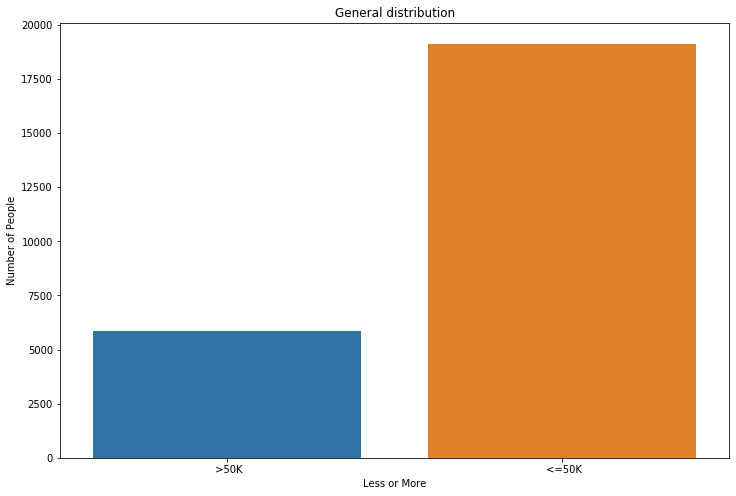

In [95]:
plt.figure(figsize = (12, 8))
sns.countplot(data = applying_data,
               x = 'Income' )
plt.title("General distribution")
plt.xlabel("Less or More")
plt.ylabel("Number of People")

In [ ]:
df1['Range'].value_counts().plot(kind = "bar" , figsize = (5,5))
plt.xlabel('Salary')
plt.ylabel('Count of individuals')